In [2]:
import numpy as np
results_lcda = np.array([0.4400, 0.64454, 0.4037])
results_qa = np.array([0.444, 0.648, 0.416])

sem_lcda = np.array([0.007, 0.003, 0.006])
sem_qa = np.array([1e-17, 7.8e-17, 8.5e-5])/np.sqrt(100)

relative_increase = (results_qa-results_lcda) / results_lcda * 100
error_increase = (100/results_lcda) * (sem_qa + sem_lcda*(results_qa/results_lcda))

print("Graphs :            [  KARATE     AAL 90   DOSENBACH ]")
print("Relative increase: ",  relative_increase)
print("Error in increase: ", error_increase)

Graphs :            [  KARATE     AAL 90   DOSENBACH ]
Relative increase:  [0.90909091 0.53681695 3.04681694]
Error in increase:  [1.6053719  0.46794683 1.53364107]


In [18]:
# Manual test for significancy
# Welch's t-test
from scipy.stats import t

t_scores = (results_qa-results_lcda)/np.sqrt(sem_qa**2+sem_lcda**2)
freedom = list(np.array((sem_qa**2+sem_lcda**2)**2 / ( (sem_qa**4/99) + (sem_lcda**4/99) ), dtype = np.int16))
p_vals = 1-t.cdf(t_scores, freedom)
cohens_d = (results_qa - results_lcda) / np.sqrt((99*(sem_qa**2) + 99*(sem_lcda**2))/200) 
print("P-vals: ", p_vals)
print("Coehn's d:", cohens_d)


P-vals:  [0.28450211 0.12577527 0.0215041 ]
Coehn's d: [0.81219321 1.63927662 2.9137402 ]


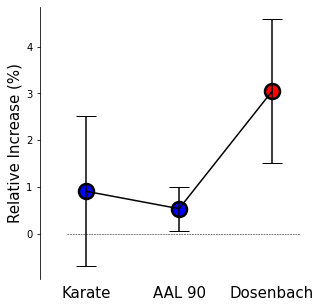

In [16]:
import matplotlib.pylab as plt
import matplotlib.patches as patches
%matplotlib inline
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
ax.plot([1.5,2], relative_increase[:-1], 'o', markerfacecolor='blue', markersize=15, markeredgewidth=2.5, markeredgecolor='black')
ax.plot([2.5], relative_increase[-1], 'o', markerfacecolor='red', markersize=15, markeredgewidth=2.5, markeredgecolor='black')
ax.errorbar([1.5,2,2.5], relative_increase, yerr=error_increase, capsize=10, color='black')
ax.hlines(0, 1.4, 2.65, linestyle='--', color='black', linewidth=0.5)
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set_xlim([1.25, 2.75])
ax.set_ylabel("Relative Increase (%)", fontsize=15)
ax.set_xticks([1.5,2,2.5])
ax.set_xticklabels(["Karate", "AAL 90", "Dosenbach"], fontsize=15)
ax.xaxis.set_ticks_position('none') 

plt.savefig("Relative increase.svg", dpi=400, format='svg', transparent=False)

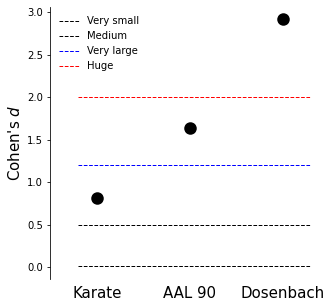

In [29]:
import matplotlib.pylab as plt
import matplotlib.patches as patches
%matplotlib inline
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
ax.plot([1.5, 2, 2.5], cohens_d, 'o', markerfacecolor='black', markersize=10, markeredgewidth=2.5, markeredgecolor='black')
ax.hlines(0.01, 1.4, 2.65, linestyle='--', color='black', linewidth=1, label="Very small")
ax.hlines(0.50, 1.4, 2.65, linestyle='--', color='black', linewidth=1, label="Medium")
ax.hlines(1.20, 1.4, 2.65, linestyle='--', color='blue', linewidth=1, label="Very large")
ax.hlines(2.0, 1.4, 2.65, linestyle='--', color='red', linewidth=1, label="Huge")
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set_xlim([1.25, 2.75])
ax.set_ylabel("Cohen's $d$", fontsize=15)
ax.set_xticks([1.5,2,2.5])
ax.set_xticklabels(["Karate", "AAL 90", "Dosenbach"], fontsize=15)
ax.xaxis.set_ticks_position('none') 
plt.legend(frameon=False)

plt.savefig("Effect size.svg", dpi=400, format='svg', transparent=False)